## Measuring Beam Current 

In [1]:
import tifffile as tiff
import os 
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy.constants as sc

##if you want to use the cyberpunk plotting style
import matplotlib
import mplcyberpunk
plt.style.use('cyberpunk')
matplotlib.rc('xtick', labelsize=15) 
matplotlib.rc('ytick', labelsize=15) 
matplotlib.rc('ytick', labelsize=15) 


## global fig size
plt.rcParams['figure.figsize'] = [5,5]
#need to be set for the interactive GUI
%matplotlib ipympl

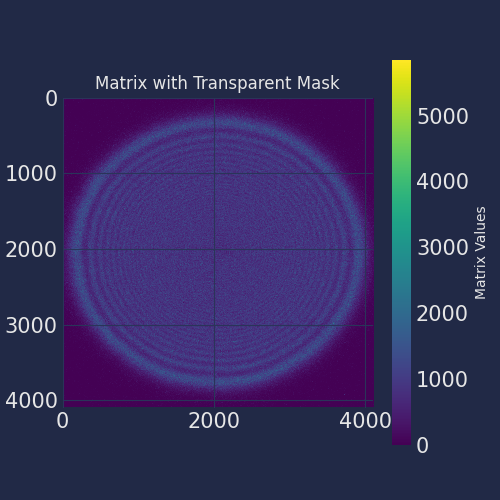

In [2]:
#load the measurements 
# tiff_file_path = "//masc_shared/ag_volz/TEM_Calibrations/TEM_Dose_SPOT/Spot1_CLA3001.tif"
# tiff_file_path = "//masc_shared/ag_volz/TEM_Calibrations/TEM_Dose_SPOT/Spot2_CLA3002.tif"
# tiff_file_path = "//masc_shared/ag_volz/TEM_Calibrations/TEM_Dose_SPOT/Spot3_CLA3_.tif"
# tiff_file_path = "//masc_shared/ag_volz/TEM_Calibrations/TEM_Dose_SPOT/Spot4_CLA3004.tif"
tiff_file_path = "//masc_shared/ag_volz/TEM_Calibrations/TEM_Dose_SPOT/Spot5_CLA3005.tif"


img = tiff.imread(tiff_file_path)
# Plot the original matrix
plt.close('all')
plt.imshow(img, cmap='viridis', interpolation='nearest')
plt.colorbar(label='Matrix Values')
plt.title("Matrix with Transparent Mask")
plt.show()

In [3]:
## read only one value

# # Path to the TIFF file
# tiff_file_path = "path_to_your_file.tiff"

# Open the TIFF file
with tiff.TiffFile(tiff_file_path) as tiff_file:
    # Select the first page of the TIFF
    page = tiff_file.pages[0]
    
    # Access a specific tag by name
    tag_name = "TVIPS"  # Replace with the tag you want
    if tag_name in page.tags:
        tag_value = page.tags[tag_name].value
        # print(f"{tag_name}: {tag_value}")
    else:
        print(f"Tag '{tag_name}' not found in the TIFF file.")

    print('Sensitivity', page.tags['TVIPS'].value['Sensitivity'])


Sensitivity 84.0


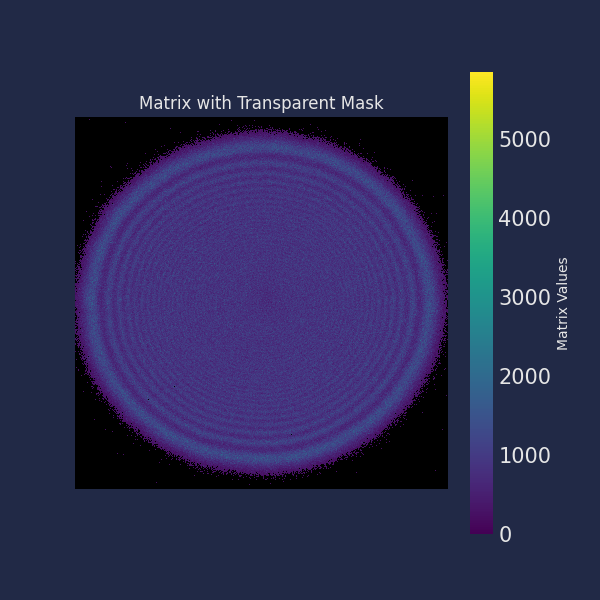

In [4]:
## get values by treshold
matrix = img
# Set the threshold
threshold = 200

# Get all values above the threshold

#make a mask 
mask = matrix > threshold
values_above_threshold = matrix[mask]

# Create a transparency mask (alpha channel)
alpha_mask = np.where(mask, 1.0, 0.0)  # Fully transparent for mask values, opaque otherwise

# Plot the matrix with the transparency mask
plt.figure(figsize=(6, 6))

# Plot the original matrix
plt.imshow(matrix, cmap='viridis', interpolation='nearest')
plt.colorbar(label='Matrix Values')
plt.title("Matrix with Transparent Mask")

# Overlay the mask with a grayscale colormap and custom alpha mask
plt.imshow(mask, cmap='grey', interpolation='nearest', alpha=1.0)  # Grayscale overlay
plt.imshow(matrix, cmap='viridis', interpolation='nearest', alpha=alpha_mask)

plt.axis('off')
plt.show()


In [7]:
## get sum value of region above the threshold
sum_value = np.sum(values_above_threshold)
sum_value

10628513533

In [5]:
## define parameters
e = sc.elementary_charge
pi = sc.pi
# e_conversion_factor = 84 # cts/e
e_conversion_factor = page.tags['TVIPS'].value['Sensitivity']
dwell_time = page.tags['TVIPS'].value['ExposureTime']/1000 # s --> is stored in ms

print('e_conversion_factor', e_conversion_factor, 'cts/e')
print('dwell_time', dwell_time, 's')


e_conversion_factor 84.0 cts/e
dwell_time 1.0 s


In [10]:
## EXAMPLE
I_b_pA = sum_value/e_conversion_factor*e/dwell_time*10**12 # in pA
print('Beam Current', I_b_pA, 'pA')

Beam Current 20.27232861514927 pA


In [99]:
## SPOT1 CLA3
e_converion_factor = 84 # cts/e
I_b_pA = sum_value/e_conversion_factor*e/dwell_time*10**12 # in pA
I_b_pA

63.997073274758144

In [107]:
## SPOT2 CLA3
e_converion_factor = 84 # cts/e
I_b_pA = sum_value/e_conversion_factor*e/dwell_time*10**12 # in nA
I_b_pA

47.62752795171485

In [116]:
## SPOT3 CLA3
e_converion_factor = 84 # cts/e
I_b_pA = sum_value/e_conversion_factor*e/dwell_time*10**12 # in nA
I_b_pA

35.88637108456992

In [121]:
## SPOT4 CLA3
e_converion_factor = 84 # cts/e
I_b_pA = sum_value/e_conversion_factor*e/dwell_time*10**12 # in nA
I_b_pA

27.253859102889823

In [125]:
## SPOT5 CLA3
e_converion_factor = 84 # cts/e
I_b_pA = sum_value/e_conversion_factor*e/dwell_time*10**12 # in nA
I_b_pA

20.095876372483154

In [127]:
## Beam_Current List
#setup the list
# Importing NaN representation
from math import nan

# Base dictionary
spots_dict = {f"Spot{i}C": i for i in range(1, 11)}

# Adding nested structure with NaN values
for key in spots_dict.keys():
    spots_dict[key] = {
        "CLA1": nan,
        "CLA2": nan,
        "CLA3": nan,
        "CLA4": nan
    }

print(spots_dict)


{'Spot1C': {'CLA1': nan, 'CLA2': nan, 'CLA3': nan, 'CLA4': nan}, 'Spot2C': {'CLA1': nan, 'CLA2': nan, 'CLA3': nan, 'CLA4': nan}, 'Spot3C': {'CLA1': nan, 'CLA2': nan, 'CLA3': nan, 'CLA4': nan}, 'Spot4C': {'CLA1': nan, 'CLA2': nan, 'CLA3': nan, 'CLA4': nan}, 'Spot5C': {'CLA1': nan, 'CLA2': nan, 'CLA3': nan, 'CLA4': nan}, 'Spot6C': {'CLA1': nan, 'CLA2': nan, 'CLA3': nan, 'CLA4': nan}, 'Spot7C': {'CLA1': nan, 'CLA2': nan, 'CLA3': nan, 'CLA4': nan}, 'Spot8C': {'CLA1': nan, 'CLA2': nan, 'CLA3': nan, 'CLA4': nan}, 'Spot9C': {'CLA1': nan, 'CLA2': nan, 'CLA3': nan, 'CLA4': nan}, 'Spot10C': {'CLA1': nan, 'CLA2': nan, 'CLA3': nan, 'CLA4': nan}}


In [132]:
## calibrated with Varun in pA - detailed evaluation
spots_dict['Spot1C']['CLA3'] = 64.0
spots_dict['Spot2C']['CLA3'] = 47.6
spots_dict['Spot3C']['CLA3'] = 35.9
spots_dict['Spot4C']['CLA3'] = 27.2
spots_dict['Spot5C']['CLA3'] = 20.1


In [131]:
## save to txt file

# Save as plain text
with open("Beam_Currents_2200_TEM_Mode_pA.txt", "w") as file:
    for key, value in spots_dict.items():
        file.write(f"{key}: {value}\n")

print("Dictionary saved to Beam_Currents_2200_TEM_Mode_pA.txt")

Dictionary saved to Beam_Currents_2200_TEM_Mode_pA.txt


## old stuff not needed for the calculation but maybe useful later

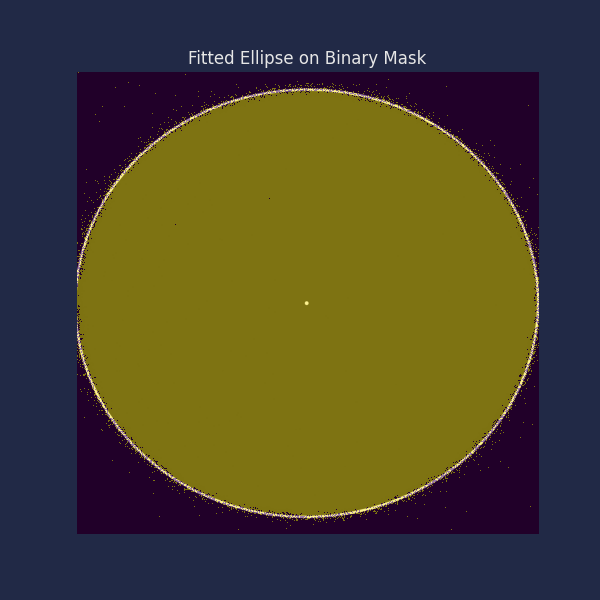

Ellipse Center: (2036.840576171875, 2049.77490234375)
Axes Lengths: (3790.114013671875, 4104.37109375)
Angle of Rotation: 89.1087646484375
CPU times: user 1.27 s, sys: 470 ms, total: 1.74 s
Wall time: 1.61 s


In [19]:
%%time
# Create a binary mask (example)
binary_mask = np.uint8(mask)

# Find contours in the binary mask
contours, _ = cv2.findContours(binary_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Fit an ellipse to the largest contour
if contours:
    largest_contour = max(contours, key=cv2.contourArea)  # Find the largest contour

    if len(largest_contour) >= 5:  # Fit ellipse requires at least 5 points
        ellipse = cv2.fitEllipse(largest_contour)  # Fit the ellipse
        result_image = cv2.cvtColor(binary_mask, cv2.COLOR_GRAY2BGR)

        # Draw the fitted ellipse
        cv2.ellipse(result_image, ellipse, (255, 255, 255), 20)  # Green ellipse
        cv2.circle(result_image, (int(ellipse[0][0]), int(ellipse[0][1])), 2, (255, 255, 255), 30)  # Red center point

        # Plot the result
        plt.figure(figsize=(6, 6))
        plt.imshow(cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB))
        plt.title("Fitted Ellipse on Binary Mask")
        plt.axis("off")

        plt.imshow(mask, cmap='viridis', interpolation='nearest',alpha=0.5)
        
        plt.show()

        print(f"Ellipse Center: {ellipse[0]}")
        print(f"Axes Lengths: {ellipse[1]}")
        print(f"Angle of Rotation: {ellipse[2]}")
    else:
        print("Not enough points to fit an ellipse.")
else:
    print("No contours found in the binary mask.")

In [134]:
# Calculate the area of the ellipse
major_axis = ellipse[1][0]  # Length of the major axis
minor_axis = ellipse[1][1]  # Length of the minor axis
area_ellipse = math.pi * (major_axis / 2) * (minor_axis / 2)
print("Area_of_Ellipse:", area_ellipse)

Area_of_Ellipse: 11859325.477501925


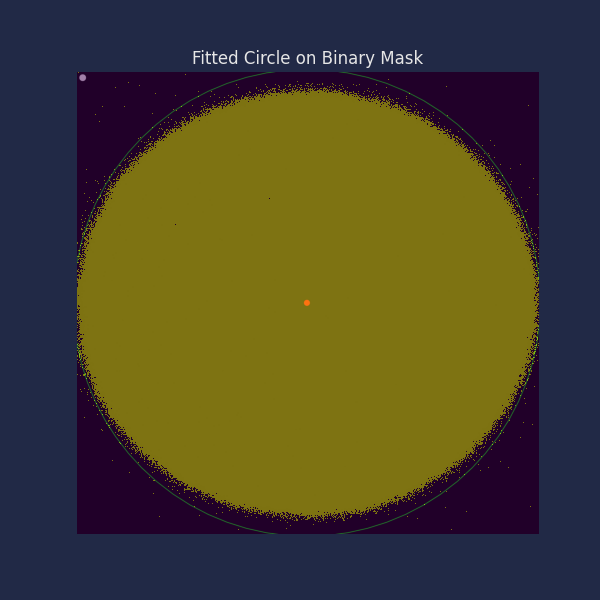

Circle Center: (2038, 2046), Radius: 2070


In [12]:
## first approach fit circle --> bad

import cv2
import numpy as np
import matplotlib.pyplot as plt

binary_mask = mask

# Create a binary mask (example)
binary_mask = np.zeros((100, 100), dtype=np.uint8)
binary_mask = np.uint8(mask)
cv2.circle(binary_mask, (50, 50), 30, 255, -1)  # Draw a filled circle on the mask

# Find contours in the binary mask
contours, _ = cv2.findContours(binary_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Fit a circle to the largest contour
if contours:
    largest_contour = max(contours, key=cv2.contourArea)  # Find the largest contour
    (x, y), radius = cv2.minEnclosingCircle(largest_contour)  # Fit the enclosing circle
    center = (int(x), int(y))
    radius = int(radius)

    # Draw the fitted circle on a visualization image
    result_image = cv2.cvtColor(binary_mask, cv2.COLOR_GRAY2BGR)
    cv2.circle(result_image, center, radius, (0, 255, 0), 5)  # Green circle
    cv2.circle(result_image, center, 2, (0, 0, 255), 50)      # Red center point

    # Plot the result
    plt.figure(figsize=(6, 6))
    plt.imshow(cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB))
    plt.title("Fitted Circle on Binary Mask")
    plt.axis("off")

    plt.imshow(mask, cmap='viridis', interpolation='nearest',alpha=0.5)
    plt.show()

    print(f"Circle Center: {center}, Radius: {radius}")
else:
    print("No contours found in the binary mask.")

In [ ]:
## EXAMPLE SIMPLE APPROACH
## SPOT1 CLA3
radius =  3716/2#in pixel
e_converion_factor = 84 # cts/e
I_per_pixel = 3750 #cts/px
I_b_pA = I_per_pixel*pi*radius**2/e_converion_factor*e/dwell_time*10**12 # in nA
I_b_pA

In [ ]:
## original calculaiton

# calculate cirle intensity
radius = 1886 # in pixel
pixel_size = 1**2#px2
Area = pi*radius**2 #px²
e_converion_factor = 84 # cts/e
I_per_pixel = 2000

I_sum = I_per_pixel*Area
num_electrons = I_sum/e_converion_factor
Q = num_electrons*e
dwell_time = 1 #s
t = dwell_time#time

I_b = Q/t

I_b # Ampere
I_b_pA = I_b*10**12
I_b_pA

In [ ]:
## calibrated with Varun in pA - simple approach
spots_dict['Spot1C']['CLA3'] = 77.6
spots_dict['Spot2C']['CLA3'] = 51.9
spots_dict['Spot3C']['CLA3'] = 42.6
spots_dict['Spot4C']['CLA3'] = 32.5
spots_dict['Spot5C']['CLA3'] = 24.8

In [26]:
## read tiff metadata --> dwell time?, e snsitivity?
with tiff.TiffFile(tiff_file_path) as tiff_file:
    # Access metadata from the file
    metadata = tiff_file.pages[0].tags  # Metadata for the first page
    description = tiff_file.pages[0].description  # Description tag (if available)
        # Print metadata
    print("TIFF Metadata:")
    for tag in metadata.values():
        tag_name = tag.name
        tag_value = tag.value
        print(f"{tag_name}: {tag_value}")

    # Print file description (if available)
    if description:
        print("\nTIFF Description:")
        print(description)


TIFF Metadata:
ImageWidth: 4096
ImageLength: 4096
BitsPerSample: 16
Compression: 1
PhotometricInterpretation: 1
StripOffsets: (94218, 102410, 110602, 118794, 126986, 135178, 143370, 151562, 159754, 167946, 176138, 184330, 192522, 200714, 208906, 217098, 225290, 233482, 241674, 249866, 258058, 266250, 274442, 282634, 290826, 299018, 307210, 315402, 323594, 331786, 339978, 348170, 356362, 364554, 372746, 380938, 389130, 397322, 405514, 413706, 421898, 430090, 438282, 446474, 454666, 462858, 471050, 479242, 487434, 495626, 503818, 512010, 520202, 528394, 536586, 544778, 552970, 561162, 569354, 577546, 585738, 593930, 602122, 610314, 618506, 626698, 634890, 643082, 651274, 659466, 667658, 675850, 684042, 692234, 700426, 708618, 716810, 725002, 733194, 741386, 749578, 757770, 765962, 774154, 782346, 790538, 798730, 806922, 815114, 823306, 831498, 839690, 847882, 856074, 864266, 872458, 880650, 888842, 897034, 905226, 913418, 921610, 929802, 937994, 946186, 954378, 962570, 970762, 978954, 98